In [59]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [60]:
xlsx = pd.ExcelFile('Otw4_mgr.xlsx')
df_train = pd.read_excel(xlsx, 'Arkusz2')
df_test = pd.read_excel(xlsx, 'Arkusz1')

In [61]:
df_train.describe()

,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,LLD,LL3,GG_Core,GR,GRS_Core,NPHI_Core,POTA,THOR,URAN,RHOB,TOC
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,34.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,0.055960,0.089611,0.004280,0.027840,0.815231,0.007077,217.743169,83.744491,11.939871,12.351689,194.087751,181.39024,145.743326,0.293788,4.519774,11.513640,4.393631,2.585526,2.297714
std,0.072562,0.096960,0.006175,0.045081,0.053240,0.005668,0.736027,8.475774,10.564558,10.693909,64.384158,51.96734,22.431829,0.055278,0.278910,1.416542,3.536165,0.105450,3.290360
min,0.000000,0.000000,0.000000,0.000100,0.669200,0.000000,216.720400,74.640600,5.935900,5.419400,137.076700,129.46500,111.315200,0.242666,3.979300,7.654300,1.094700,2.332000,0.100000
25%,0.000200,0.000300,0.000400,0.000200,0.776500,0.003800,217.091250,77.781225,6.496000,6.453200,153.226650,147.84340,130.558750,0.258005,4.320650,10.706250,2.315150,2.553100,0.180000
50%,0.000600,0.049700,0.000700,0.004700,0.806600,0.006600,217.683100,80.453100,6.876600,6.750100,165.109300,154.99450,140.038100,0.271260,4.508400,11.890600,2.796700,2.624300,0.560000
75%,0.122000,0.180450,0.006100,0.020000,0.865850,0.008600,218.259650,86.839875,9.450850,11.081150,192.224900,183.42645,165.350250,0.292808,4.642250,12.524350,4.073700,2.657100,2.920000
max,0.220500,0.315800,0.020900,0.122700,0.900200,0.026900,219.026700,100.515600,47.636300,44.772700,330.530300,285.90200,204.642900,0.417709,5.131300,14.298600,12.357300,2.697400,10.120000


In [62]:
df_train.shape

(35, 19)

c:\Users\bachh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOC', ylabel='Density'>

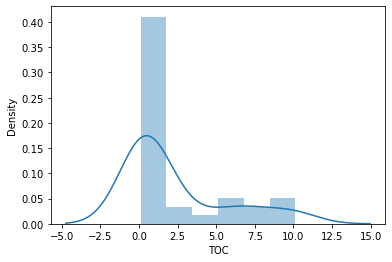

In [63]:
# Histogram of TOC
sns.distplot(df_train['TOC'])

c:\Users\bachh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOC', ylabel='Density'>

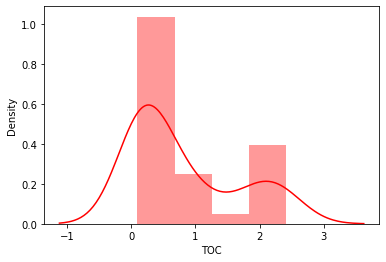

In [64]:
sns.distplot(np.log1p(df_train["TOC"]) , color = "r")

In [65]:
df_train.isnull().sum()

Vsand        0
Vlime        0
Vpiryt       0
Vkerogen     0
VCL          0
PHI          0
CAL          0
DT           1
LLD          0
LL3          0
GG_Core      0
GR           0
GRS_Core     0
NPHI_Core    0
POTA         0
THOR         0
URAN         0
RHOB         0
TOC          0
dtype: int64

In [66]:
#missing data Train set
total_train = df_train.isnull().sum().sort_values(ascending=False)
percent_train = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([total_train, percent_train], axis=1, keys=['Total', 'Percent'])
missing_data_train.head(20)

,Total,Percent
DT,1,0.028571
Vsand,0,0.000000
GG_Core,0,0.000000
RHOB,0,0.000000
URAN,0,0.000000
THOR,0,0.000000
POTA,0,0.000000
NPHI_Core,0,0.000000
GRS_Core,0,0.000000
GR,0,0.000000


In [67]:
df_test.describe()

,Vsand,Vlime,Vpiryt,Vkerogen,VCL,PHI,CAL,DT,LLD,LL3,GG_Core,GR,GRS_Core,NPHI_Core,POTA,THOR,URAN,RHOB,TOC
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,286.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,35.000000
mean,0.055261,0.110405,0.005065,0.016872,0.805848,0.006549,217.813744,81.863855,9.676185,10.062527,178.448302,169.119733,141.061207,0.281699,4.556348,11.427761,3.547804,2.610569,2.297714
std,0.071954,0.115123,0.007981,0.033469,0.076689,0.005418,0.809446,6.944101,8.386990,8.362479,50.760124,41.044119,20.936882,0.045912,0.346125,1.518463,2.718195,0.084999,3.290360
min,0.000000,0.000000,0.000000,0.000000,0.351000,0.000000,216.590900,69.609400,5.843000,5.230400,68.968300,100.021600,59.950400,0.149508,3.326500,6.624500,0.868600,2.324900,0.100000
25%,0.000200,0.000300,0.000500,0.000200,0.775950,0.002800,217.040500,77.167925,6.413125,6.354025,150.332150,144.864500,126.483275,0.258903,4.339625,10.347900,2.182725,2.590725,0.180000
50%,0.000700,0.090200,0.000800,0.001950,0.805400,0.005200,217.973900,79.882800,6.729850,6.662950,162.883000,154.990600,139.045950,0.269803,4.526450,11.590300,2.693550,2.636250,0.560000
75%,0.117775,0.196375,0.006925,0.011175,0.859500,0.009050,218.443150,83.289050,7.695750,8.683100,182.321250,169.928900,150.643450,0.286541,4.757775,12.508900,3.469650,2.663425,2.920000
max,0.233100,0.629600,0.043900,0.128800,0.952400,0.027100,221.043500,101.750000,50.231700,46.533300,336.001700,287.704300,205.955800,0.424293,5.295700,15.311200,12.357300,2.728600,10.120000


In [68]:
df_test.shape

(296, 19)

In [69]:
df_test.isnull().sum()

Vsand          0
Vlime          0
Vpiryt         0
Vkerogen       0
VCL            0
PHI            0
CAL            0
DT            10
LLD            0
LL3            0
GG_Core        0
GR             0
GRS_Core       0
NPHI_Core      0
POTA           0
THOR           0
URAN           0
RHOB           0
TOC          261
dtype: int64

In [70]:
#missing data Test set
total_test = df_test.isnull().sum().sort_values(ascending=False)
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test.head(20)

,Total,Percent
TOC,261,0.881757
DT,10,0.033784
GG_Core,0,0.000000
RHOB,0,0.000000
URAN,0,0.000000
THOR,0,0.000000
POTA,0,0.000000
NPHI_Core,0,0.000000
GRS_Core,0,0.000000
GR,0,0.000000


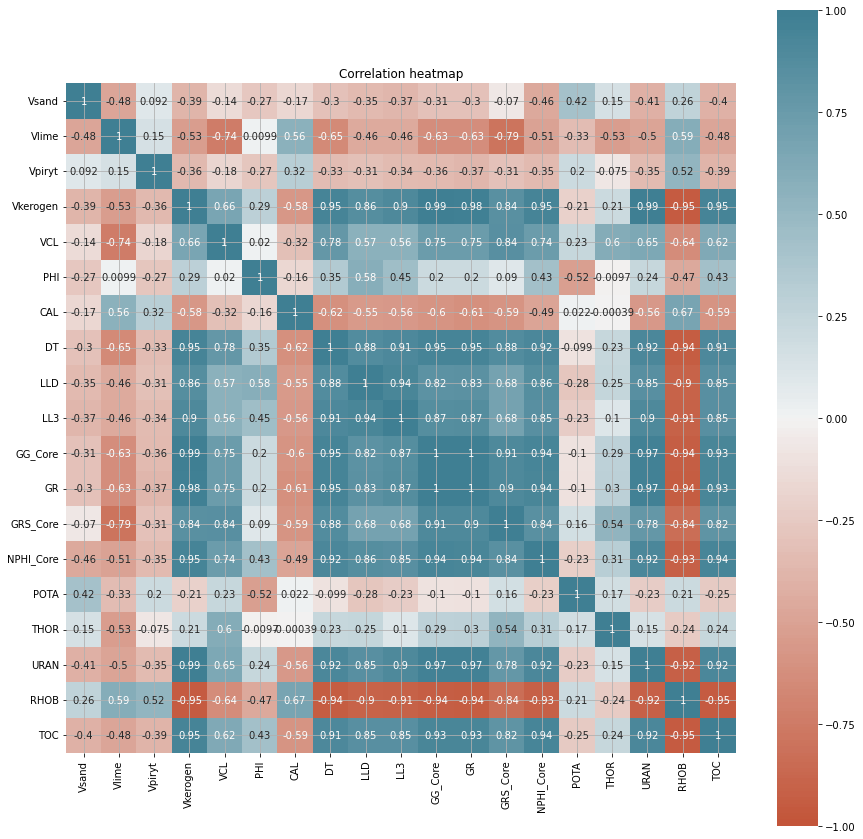

In [71]:
names = df_train.columns
corr_mat = df_train.corr(method='pearson')
fig, ax1 = plt.subplots(figsize=(15,15))
ax1 = sns.heatmap(corr_mat, 
                  center=0,
                  vmin = -1, 
                  vmax = 1, 
                  annot= True,
                  cmap= sns.diverging_palette(20,220, n=200), 
                  square=True, 
                  yticklabels=names, 
                  xticklabels=names)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.title('Correlation heatmap')
plt.grid(b=True)

In [72]:
df_train = df_train.fillna(0)

# logarithmic transformation
ln_df_train = np.log1p(df_train)

In [73]:
"""
# create the Scaler object
scaler = preprocessing.StandardScaler()
# fit data on the scaler object
scaled_df = scaler.fit_transform(df_train)
scaled_df = pd.DataFrame(scaled_df, columns= names)
"""

'\n# create the Scaler object\nscaler = preprocessing.StandardScaler()\n# fit data on the scaler object\nscaled_df = scaler.fit_transform(df_train)\nscaled_df = pd.DataFrame(scaled_df, columns= names)\n'

In [74]:
"""
# create the Scaler object
scaler = preprocessing.MinMaxScaler()
# fit data on the scaler object
scaled_df = scaler.fit_transform(df_train)
scaled_df = pd.DataFrame(scaled_df, columns= names)
"""

'\n# create the Scaler object\nscaler = preprocessing.MinMaxScaler()\n# fit data on the scaler object\nscaled_df = scaler.fit_transform(df_train)\nscaled_df = pd.DataFrame(scaled_df, columns= names)\n'

In [75]:
X= ln_df_train.iloc[:, 0:-1].values
y= ln_df_train.iloc[:,-1].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
print(X_train.shape)

(28, 18)


In [77]:
# Reshape data by adding 3rd dimension that will be the number of single input row
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train_reshaped.shape) 
print(X_test_reshaped.shape) 

# [batch_size, time_steps, input_dimension] => (35, 18, 1)
# each sample has 18 time steps with 1 input dimension /or each sample has 18 rows 1 column!

(28, 18, 1)
(7, 18, 1)


# 1D convolution neural network

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Input, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
#from keras_scikit_learn.wrappers import KerasRegressor  # Import from keras_scikit_learn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, make_scorer
import numpy as np

np.random.seed(0)
tf.random.set_seed(32)

# Rest of your code...




In [79]:
def build_conv1D_model():
    # define linear regression model and its structure
    model = Sequential(name='model_Conv1D')
    model.add(Input(shape= (18,1)))
    model.add(Conv1D(filters= 128, kernel_size=3, activation='relu', name='Conv1D'))
    #model.add(Dropout(0.5))
    model.add(Conv1D(filters= 64, kernel_size=3, activation='relu', name='Conv1D_2'))
    #model.add(Conv1D(filters= 16, kernel_size=2, activation='relu', name='Conv1D_3'))
    model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(Flatten())
    model.add(Dense(18, activation="relu", name='Dense_1.1'))
    model.add(Dense(1, activation='linear', name='Dense_2'))

    # compile the model
    model.compile(optimizer= 'rmsprop', loss='mse', metrics=['mae'])

    return model
model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D (Conv1D)             (None, 16, 128)           512       
                                                                 
 Conv1D_2 (Conv1D)           (None, 14, 64)            24640     
                                                                 
 MaxPooling1D (MaxPooling1D  (None, 7, 64)             0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 448)               0         
                                                                 
 Dense_1.1 (Dense)           (None, 18)                8082      
                                                                 
 Dense_2 (Dense)             (None, 1)                 19        
                                                      

Epoch 369: early stopping


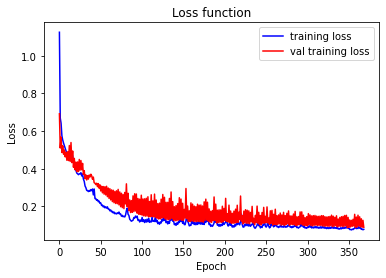

In [80]:
# Pass several parameters to 'EarlyStopping' function and assigns it to 'earlystopper'
earlystopper = EarlyStopping(monitor='val_loss', min_delta= 0, patience= 20, 
                              verbose= 1, mode='auto')

# fit the model
history = model_conv1D.fit(X_train_reshaped, y_train, epochs = 1500, validation_split = 0.25, 
                    shuffle= False, verbose=0, callbacks= [earlystopper])

# plot model's trainning cost/loss and model's validation split cost/loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.plot(loss_values,'b', label='training loss')
plt.plot(val_loss_values,'r', label='val training loss')
plt.title("Loss function")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [81]:
# run the model with its current weights on the training and testing data
y_train_pred = model_conv1D.predict(X_train_reshaped)
y_test_pred = model_conv1D.predict(X_test_reshaped)
print(np.expm1(y_train_pred).T)
print(np.expm1(y_test_pred).T)

1/1 [==============================] - 0s 22ms/step
[[0.6145116  0.4191491  8.238525   9.432599   2.6147006  1.0994799
  6.659989   1.3807809  0.8652911  0.25563514 0.63259184 0.4068526
  0.46221632 1.2788973  9.462912   0.8106334  0.701288   0.7197126
  8.403399   0.6652559  0.33863255 4.9323378  0.4633859  0.61547923
  0.5404886  0.89339006 0.8786578  1.1468487 ]]
[[1.89956    0.32744318 0.41130233 8.162959   6.270482   0.6998874
  0.68947554]]


In [82]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score on the Train set is:      \t{:0.3f}'.format(r2_score(y_train, y_train_pred)))
print('R2 score on the Test set is:       \t{:0.3f}'.format(r2_score(y_test, y_test_pred)))
print('MSE score on the Train set is: \t{:0.3f}'.format(mean_squared_error(y_train, y_train_pred)))
print('MSE score on the Test set is: \t{:0.3f}'.format(mean_squared_error(y_test, y_test_pred)))

R2 score on the Train set is:      	0.874
R2 score on the Test set is:       	0.741
MSE score on the Train set is: 	0.079
MSE score on the Test set is: 	0.207


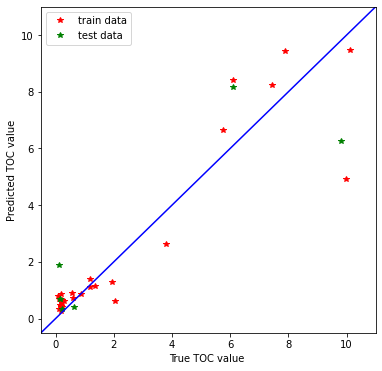

In [83]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(np.expm1(y_train), np.expm1(y_train_pred),'*r', label='train data')
ax.plot(np.expm1(y_test), np.expm1(y_test_pred), '*g', label='test data')
ax.plot([-0.5, 11], [-0.5, 11], ls="-", color="b")
ax.set(xlim=(-0.5, 11), ylim=(-0.5, 11))
ax.set_xlabel('True TOC value ')
ax.set_ylabel('Predicted TOC value')
plt.legend()

c:\Users\bachh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\bachh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


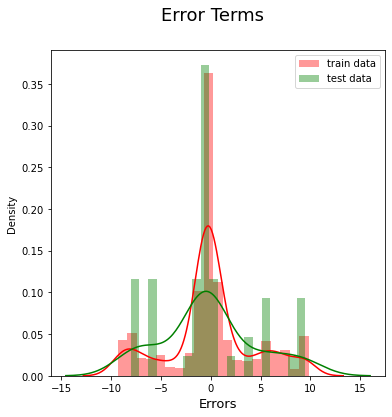

In [84]:
import seaborn as sns
# Plot the histogram of the error terms
fig, ax = plt.subplots(figsize=(6,6))
sns.distplot((np.expm1(y_train) - np.expm1(y_train_pred)), bins = 20, label='train data', color='r')
sns.distplot((np.expm1(y_test) - np.expm1(y_test_pred)), bins = 20, label='test data', color='g')
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 13)                         # X-label
plt.legend()

# Predict unknown data for the whole dataset

In [85]:
# import whole data
unkn_df = pd.read_excel(xlsx, 'Arkusz1')

In [86]:
# fill NaN
unkn_df = unkn_df.fillna(0)
ln_unkn_df = np.log1p(unkn_df)

"""
# fit data on the scaler object
scaled_unkn_df = scaler.fit_transform(n_unkn_df)
scaled_unkn_df = pd.DataFrame(scaled_unkn_df, columns= names)
"""

'\n# fit data on the scaler object\nscaled_unkn_df = scaler.fit_transform(n_unkn_df)\nscaled_unkn_df = pd.DataFrame(scaled_unkn_df, columns= names)\n'

In [87]:
# make prediction for unknown TOC values
rows = ln_unkn_df.iloc[:, 0:-1].values
rows_reshaped = rows.reshape(rows.shape[0],rows.shape[1],1)
rows_pred = model_conv1D.predict(rows_reshaped)

TOC_col = pd.DataFrame(np.expm1(rows_pred), columns=['pred_TOC'])
TOC_col = TOC_col.round(decimals=2)
TOC_col.to_excel('Conv1D_pred.xlsx')
print(TOC_col.head(60))

10/10 [==============================] - 0s 2ms/step
    pred_TOC
0       1.11
1       1.26
2       1.29
3       1.27
4       1.18
5       1.15
6       0.99
7       0.88
8       0.83
9       0.81
10      0.81
11      0.81
12      0.93
13      1.00
14      1.03
15      1.03
16      0.97
17      0.86
18      0.76
19      0.67
20      0.61
21      0.62
22      0.64
23      0.71
24      0.80
25      0.91
26      0.97
27      0.99
28      0.96
29      0.93
30      0.88
31      0.83
32      0.81
33      0.73
34      0.67
35      0.62
36      0.57
37      0.55
38      0.52
39      0.55
40      0.58
41      0.61
42      0.67
43      0.68
44      0.69
45      0.72
46      0.75
47      0.72
48      0.70
49      0.66
50      0.63
51      0.70
52      0.72
53      0.75
54      0.78
55      0.79
56      0.72
57      0.69
58      0.64
59      0.61
